## 大乐透_移动100期出击次数统计2022-06-15



In [1]:
# 取当前日期和时间
import time
date = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
print(date)

# 导入模块
import pandas as pd
import numpy as np
# 导入排列组合计算函数
#调用scipy科学计算包中计算排列组合（permutation and combination）的模块
from scipy.special import perm, comb
#调用 itertools库（内置库） 获取排列组合的全部情况数
from itertools import permutations, combinations

2022-06-15 23:07:58


In [2]:
path = '大乐透总历史开奖号码表.xlsx'
df = pd.read_excel(path)
print(df.shape)
df.head()

(4018, 17)


,期号,日期,H1,H2,H3,H4,H5,L1,L2,红和值,红均值,蓝和值,蓝均值,红偶数个数,年份,年内期号,年内月号
0,22067,2022-06-15,4,14,15,32,33,10,11,98,20,21,11,3,2022,67,6
1,22066,2022-06-13,2,24,25,26,34,3,12,111,22,15,8,4,2022,66,6
2,22065,2022-06-11,5,10,13,22,28,1,4,78,16,5,3,3,2022,65,6
3,22064,2022-06-08,2,19,22,25,35,5,7,103,21,12,6,2,2022,64,6
4,22063,2022-06-06,2,3,22,26,31,6,10,84,17,16,8,3,2022,63,6


In [3]:
# 100期蓝球
# 统计100期间个球累计出击次数[<<13, >=13to<15, >=15to<16, >=16to<19, >=19to<23, >=23],分5个区间;
df_lq = df.loc[:,['期号','日期','L1','L2']]
df_lq100 = df_lq.copy()
df_lq25 = df_lq.copy()
columns100 = ['<13', '>=13to<15', '>=15to<16', '>=16to<19', '>=19to<23', '>=23', 'max3', 'max5', 'max8', 'max13'] 
#columns25 = ['<=2', '3', '4', '5', '6', '>=7', 'max3', 'max5', 'max8', 'max13'] 
for i in columns100:
    df_lq100[i] = 0
# for i in columns25:
#     df_lq25[i] = 0

dd_text100 = list(df_lq100.columns[4:10])
dd_sum100 = list(df_lq100.columns[-4:])
qishu = 25
for i_qs in range(qishu):
    df1 = df_lq100[i_qs+1:100+i_qs+1]
    df2 = df1.iloc[:,2:4]
    dd = []
    l1 = df2['L1'].values
    l2 = df2['L2'].values
    dd = list(l1.copy())
    dd.extend(l2)
    dd1 = set(dd)  #('本轮100期间，出现过的篮球有如下：', dd1)
    
    dd2 = []
    dd3 = []
    dd4 = []
    dd5 = []
    dd6 = []
    dd7 = []
    a = 0
    for i in dd1:
        for ii in dd:
            if i==ii:
                a = a+1
        if a>=1 and a<13:
            dd2.append(i)
        elif a>=13 and a<15:
            dd3.append(i)
        elif a>=15 and a<16:
            dd4.append(i)
        elif a>=16 and a<19:
            dd5.append(i)
        elif a>=19 and a<23:
            dd6.append(i)
        elif a>=23:
            dd7.append(i)
        a = 0
    dd_len = [len(dd2),len(dd3),len(dd4),len(dd5),len(dd6),len(dd7)]
    dd_list = [dd2,dd3,dd4,dd5,dd6,dd7]
    L1 = df_lq['L1'][i_qs]
    L2 = df_lq['L2'][i_qs]
    
    for i in range(len(dd_list)):
        a = 0
        if L1 in dd_list[i]:
            i1 = i
            a += 1
        if L2 in dd_list[i]:
            i2 = i
            a += 1
        df_lq100[dd_text100[i]][i_qs] = a
        
    
    if i_qs<=2 : 
        print(df_lq['期号'][i_qs],'期以后的近100期出现过的篮球有如下：', dd1)
        print('统计此轮近100期间蓝球累计出击次数分6个区间', dd_text100, '=', dd_len)
        print(dd_list)
        print('此轮蓝球', [L1, L2], '出现的区间为：', dd_text100[i1], '=', dd_list[i1], '；', dd_text100[i2], '=', dd_list[i2])
        print('-'*118)


s = [3,5,8,13]
for i_qs in range(qishu-13):
    for i1 in range(len(s)):
        sum_list = []
        for i in dd_text100:
            sum_list.append(df_lq100[i][i_qs : i_qs+s[i1]].sum())
        for ii in range(len(sum_list)):
            if sum_list[ii] == np.array(sum_list).max():
                #print('ii=', ii, sum_list[ii], dd_text100[ii] )
                df_lq100[dd_sum100[i1]][i_qs] = dd_text100[ii]
       
    
df_lq100.head(3)



22067 期以后的近100期出现过的篮球有如下： {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
统计此轮近100期间蓝球累计出击次数分6个区间 ['<13', '>=13to<15', '>=15to<16', '>=16to<19', '>=19to<23', '>=23'] = [2, 2, 1, 3, 2, 2]
[[2, 3], [4, 8], [10], [1, 11, 12], [6, 7], [5, 9]]
此轮蓝球 [10, 11] 出现的区间为： >=15to<16 = [10] ； >=16to<19 = [1, 11, 12]
----------------------------------------------------------------------------------------------------------------------
22066 期以后的近100期出现过的篮球有如下： {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
统计此轮近100期间蓝球累计出击次数分6个区间 ['<13', '>=13to<15', '>=15to<16', '>=16to<19', '>=19to<23', '>=23'] = [2, 2, 2, 2, 2, 2]
[[2, 3], [4, 8], [10, 12], [1, 11], [6, 7], [5, 9]]
此轮蓝球 [3, 12] 出现的区间为： <13 = [2, 3] ； >=15to<16 = [10, 12]
----------------------------------------------------------------------------------------------------------------------
22065 期以后的近100期出现过的篮球有如下： {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
统计此轮近100期间蓝球累计出击次数分6个区间 ['<13', '>=13to<15', '>=15to<16', '>=16to<19', '>=19to<23', '>=23'] = [2, 2, 2, 2, 2, 2]

C:\Users\DELL\AppData\Local\Temp/ipykernel_37088/1073561553.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lq100[dd_text100[i]][i_qs] = a
C:\Users\DELL\AppData\Local\Temp/ipykernel_37088/1073561553.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lq100[dd_sum100[i1]][i_qs] = dd_text100[ii]
D:\software\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_si

,期号,日期,L1,L2,<13,>=13to<15,>=15to<16,>=16to<19,>=19to<23,>=23,max3,max5,max8,max13
0,22067,2022-06-15,10,11,0,0,1,1,0,0,>=15to<16,>=15to<16,>=15to<16,>=15to<16
1,22066,2022-06-13,3,12,1,0,1,0,0,0,>=15to<16,>=16to<19,>=15to<16,>=15to<16
2,22065,2022-06-11,1,4,0,1,1,0,0,0,>=15to<16,>=16to<19,>=16to<19,>=13to<15


# ====================================================

In [4]:
# 100期红球
# 统计100期间个球累计出击次数[<<13, >=13to<15, >=15to<16, >=16to<19, >=19to<23, >=23],分5个区间;
df_hq = df.loc[:,['期号','日期','H1','H2','H3','H4','H5']]
df_hq100 = df_hq.copy()
columns100 = ['<11', '>=11to<13', '>=13to<14', '>=14to<16', '>=16to<18', '>=18', 'max3', 'max5', 'max8', 'max13'] 
#columns25 = ['<=2', '3', '4', '5', '6', '>=7', 'max3', 'max5', 'max8', 'max13'] 
for i in columns100:
    df_hq100[i] = 0
dd_text100 = list(df_hq100.columns[7:13])
dd_sum100 = list(df_hq100.columns[-4:])

qishu = 50
for i_qs in range(qishu):
    df1 = df_hq100[i_qs+1:100+i_qs+1]
    df2 = df1.iloc[:,2:7]
    dd = []
    h1 = df2['H1'].values
    h2 = df2['H2'].values
    h3 = df2['H3'].values
    h4 = df2['H4'].values
    h5 = df2['H5'].values
    dd = list(h1.copy())
    dd.extend(h2)
    dd.extend(h3)
    dd.extend(h4)
    dd.extend(h5)
    
    dd1 = set(dd)  #('本轮100期间，出现过的红球有如下：', dd1)
    dd2 = []
    dd3 = []
    dd4 = []
    dd5 = []
    dd6 = []
    dd7 = []
    a = 0
    for i in dd1:
        for ii in dd:
            if i==ii:
                a = a+1
        if a>=1 and a<11:
            dd2.append(i)
        elif a>=11 and a<13:
            dd3.append(i)
        elif a>=13 and a<14:
            dd4.append(i)
        elif a>=14 and a<16:
            dd5.append(i)
        elif a>=16 and a<18:
            dd6.append(i)
        elif a>=18:
            dd7.append(i)
        a = 0
    dd_len = [len(dd2),len(dd3),len(dd4),len(dd5),len(dd6),len(dd7)]
    dd_list = [dd2,dd3,dd4,dd5,dd6,dd7]
    H1 = df_hq['H1'][i_qs]
    H2 = df_hq['H2'][i_qs]
    H3 = df_hq['H3'][i_qs]
    H4 = df_hq['H4'][i_qs]
    H5 = df_hq['H5'][i_qs]
    
    for i in range(len(dd_list)):
        a = 0
        if H1 in dd_list[i]:
            i1 = i
            a += 1
        if H2 in dd_list[i]:
            i2 = i
            a += 1
        if H3 in dd_list[i]:
            i3 = i
            a += 1
        if H4 in dd_list[i]:
            i4 = i
            a += 1
        if H5 in dd_list[i]:
            i5 = i
            a += 1
        df_hq100[dd_text100[i]][i_qs] = a        
    
    if i_qs<=4 : 
        #print(df_lq['期号'][i_qs],'期以后的近100期出现过的篮球有如下：', dd1)
        print('统计此轮近100期间红球累计出击次数分6个区间', dd_text100, '=', dd_len)
        print(dd_list)
        print('此轮红球', [H1,H2,H3,H4,H5], '出现的区间为：', dd_text100[i1], dd_text100[i2], dd_text100[i3], dd_text100[i4], dd_text100[i5])
        print('-'*118)


s = [3,5,8,13]
sum_list = []
sum_all3 = []
sum_all5 = []
sum_all8 = []
sum_all13 = []
for i_qs in range(qishu-13):
    sum_list = []
    sum_list0 = []
    for i in dd_text100:
        sum_list0.append(df_hq100[i][i_qs : i_qs+3].sum())
    sum_all3.append(sum_list0)
    sum_list.append(sum_list0)
    sum_list0 = []
    for i in dd_text100:
        sum_list0.append(df_hq100[i][i_qs : i_qs+5].sum())
    sum_all5.append(sum_list0)
    sum_list.append(sum_list0)
    sum_list0 = []
    for i in dd_text100:
        sum_list0.append(df_hq100[i][i_qs : i_qs+8].sum())
    sum_all8.append(sum_list0)
    sum_list.append(sum_list0)
    sum_list0 = []
    for i in dd_text100:
        sum_list0.append(df_hq100[i][i_qs : i_qs+13].sum())
    sum_all13.append(sum_list0)
    sum_list.append(sum_list0)
    
    for i1 in range(len(sum_list)):
        for i2 in range(len(sum_list[i1])):
            if sum_list[i1][i2] == np.array(sum_list[i1]).max():
                #print('ii=', ii, sum_list[ii], dd_text100[ii] )
                df_hq100[dd_sum100[i1]][i_qs] = dd_text100[i2]

    if i_qs <=4:
        print('sum_list =', sum_list)
df_hq100.head()



C:\Users\DELL\AppData\Local\Temp/ipykernel_37088/1672806278.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq100[dd_text100[i]][i_qs] = a


统计此轮近100期间红球累计出击次数分6个区间 ['<11', '>=11to<13', '>=13to<14', '>=14to<16', '>=16to<18', '>=18'] = [7, 2, 6, 10, 5, 5]
[[3, 6, 13, 23, 24, 27, 32], [15, 21], [14, 20, 22, 28, 30, 33], [4, 5, 7, 8, 9, 10, 12, 26, 29, 31], [16, 19, 25, 34, 35], [1, 2, 11, 17, 18]]
此轮红球 [4, 14, 15, 32, 33] 出现的区间为： >=14to<16 >=13to<14 >=11to<13 <11 >=13to<14
----------------------------------------------------------------------------------------------------------------------
统计此轮近100期间红球累计出击次数分6个区间 ['<11', '>=11to<13', '>=13to<14', '>=14to<16', '>=16to<18', '>=18'] = [7, 2, 5, 10, 6, 5]
[[3, 6, 13, 23, 24, 27, 32], [15, 21], [14, 20, 22, 30, 33], [4, 5, 7, 8, 9, 10, 12, 26, 28, 31], [16, 19, 25, 29, 34, 35], [1, 2, 11, 17, 18]]
此轮红球 [2, 24, 25, 26, 34] 出现的区间为： >=18 <11 >=16to<18 >=14to<16 >=16to<18
----------------------------------------------------------------------------------------------------------------------
统计此轮近100期间红球累计出击次数分6个区间 ['<11', '>=11to<13', '>=13to<14', '>=14to<16', '>=16to<18', '>=18'] = [7,

C:\Users\DELL\AppData\Local\Temp/ipykernel_37088/1672806278.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hq100[dd_sum100[i1]][i_qs] = dd_text100[i2]
D:\software\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,期号,日期,H1,H2,H3,H4,H5,<11,>=11to<13,>=13to<14,>=14to<16,>=16to<18,>=18,max3,max5,max8,max13
0,22067,2022-06-15,4,14,15,32,33,1,1,2,1,0,0,>=14to<16,>=14to<16,>=13to<14,<11
1,22066,2022-06-13,2,24,25,26,34,1,0,0,1,2,1,>=16to<18,>=14to<16,>=13to<14,<11
2,22065,2022-06-11,5,10,13,22,28,1,1,1,2,0,0,>=14to<16,>=13to<14,>=13to<14,<11
3,22064,2022-06-08,2,19,22,25,35,0,1,0,1,2,1,>=13to<14,>=13to<14,>=13to<14,<11
4,22063,2022-06-06,2,3,22,26,31,2,0,1,1,0,1,>=13to<14,>=13to<14,<11,<11


In [5]:
df_sum3 = pd.DataFrame(sum_all3, columns=dd_text100)
df_sum3.shape

(37, 6)

In [6]:
df_sum5 = pd.DataFrame(sum_all5, columns=dd_text100)
df_sum5.shape

(37, 6)

In [7]:
df_sum8 = pd.DataFrame(sum_all8, columns=dd_text100)
df_sum8.shape

(37, 6)

In [8]:
df_sum13 = pd.DataFrame(sum_all13, columns=dd_text100)
df_sum13.shape

(37, 6)

In [9]:
df_sum13.head()

,<11,>=11to<13,>=13to<14,>=14to<16,>=16to<18,>=18
0,15,7,12,11,10,10
1,16,6,10,12,11,10
2,15,7,11,11,11,10
3,14,7,10,10,12,12
4,14,6,11,9,13,12


In [10]:
# 画图
# 导入需要的函数
from bokeh.plotting import figure, output_notebook, show
#import seaborn as sns
from matplotlib import pyplot as plt


<11出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

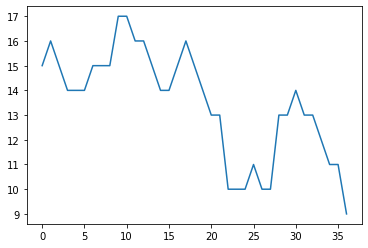

>=11to<13出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

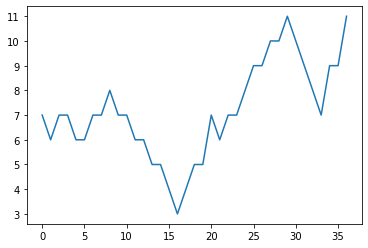

>=13to<14出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

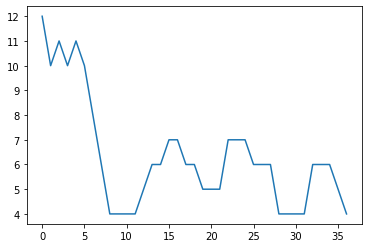

>=14to<16出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

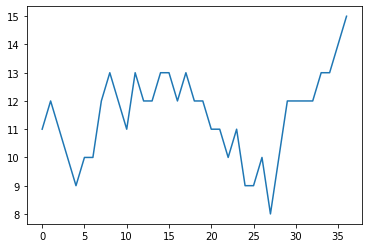

>=16to<18出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

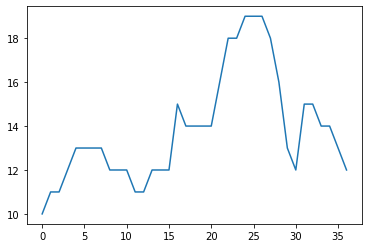

>=18出击区间次数sum3值


<Figure size 4000x1200 with 0 Axes>

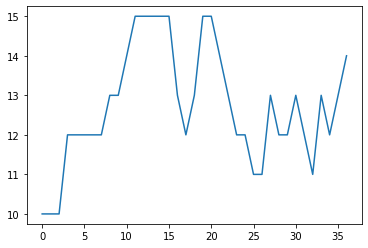

In [11]:
# 循环遍历ce中各球画出每13期移动出击次数线
c = list(df_sum13.columns)
for i in c:
    # 计算x/y的数据
    y = list(df_sum13[i].values)
    x = list(df_sum13.index)
    # 创建画布 p，设置 x_axis_type='datetime'
    plt.figure(figsize=(20,6),dpi=200)
    plt.figure()
    print(i+'出击区间次数sum3值')
    plt.plot(x, y)
    plt.title = i+'出击区间次数sum3值'
    plt.show()
    

[15, 21, 23, 27],  

[4, 14, 28, 31, 34]

[3, 6, 13, 22, 24, 32]

In [12]:
bb = [15, 21, 23, 27, 4, 14, 28, 31, 34]
a = set(bb)
print('##', a)
a1 = comb(len(a), 5)
a1

## {34, 4, 14, 15, 21, 23, 27, 28, 31}


126.0

In [13]:
bb = [4, 14, 28, 31, 34, 3, 6, 13, 22, 24, 32]
b = set(bb)
print('##', b)


## {32, 34, 3, 4, 6, 13, 14, 22, 24, 28, 31}


## {4, 14, 15, 21, 23, 27, 28, 31, 34}

In [14]:
print('len(a)=', len(a))
a

len(a)= 9


{4, 14, 15, 21, 23, 27, 28, 31, 34}

In [15]:
print('len(b)=', len(b))
b

len(b)= 11


{3, 4, 6, 13, 14, 22, 24, 28, 31, 32, 34}

## 2022-06-12推荐：[4, 5, 7, 8, 9, 10, 12, 20, 26, 31]
## 胆：4,7,9,12
## 拖：5,8,10,20,26,31
## 后区：10, 11
### ===============================================
## 4,7,9,12,26 + 10,11
## 5,8,10,20,31 + 10,11

[15, 21, 23, 27],  

[4, 14, 28, 31, 34]

[3, 6, 13, 22, 24, 32]

<Figure size 4000x1200 with 0 Axes>

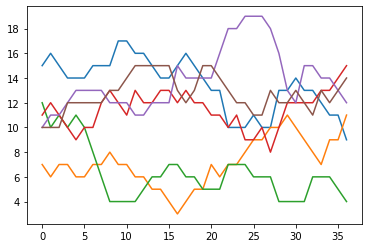

In [16]:
# 循环遍历ce中各球画出每13期移动出击次数线
c = list(df_sum13.columns)
# 计算x/y的数据
y = list(df_sum13[c].values)
x = list(df_sum13.index)
# 创建画布 p，设置 x_axis_type='datetime'
plt.figure(figsize=(20,6),dpi=200)
plt.figure()
# print(i+'出击区间次数sum3值')
plt.plot(x, y)
# plt.title = i+'出击区间次数sum3值'
plt.show()
    

In [17]:
# 取当前日期和时间
date1 = (time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
date1

'2022-06-15 23:08:07'

In [18]:
print('所用时间：', int(date1[-2:])-int(date[-2:]))

所用时间： -51


### '2022-06-15 23:08:07'推荐：
## 胆：11,27,28,35
## 拖： 全包
## 后区：1,12